### Project Setup & Exploratory Data Analysis (EDA)

#### In this notebook I explore the Aerial Object Classification dataset to understand:
* Folder structure and correct dataset path
* Number of images per class in each split (train / valid / test) 
* Sample images for each class
* Class balance / imbalance in the training set
* This helps verify that the data is correctly organized before building any models.

#### 2️⃣ Setting the Dataset Path

In this section I define the base directory for the classification dataset.

Because this notebook lives in the notebooks/ folder and the data is in ../data/classification_dataset, I move one level up using .. and then into the data folder.

This path will be reused in the rest of the notebook

In [1]:
from pathlib import Path
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import random

# ✅ Correct dataset path
base_dir = Path("../data/classification_dataset")
print("Using dataset path:", base_dir.resolve())

# Defining splits and classes
splits = ["train", "valid", "test"]
classes = ["bird", "drone"]

# Counting images per split and class
counts = {}

for split in splits:
    counts[split] = {}
    for cls in classes:
        folder = base_dir / split / cls
        if folder.exists():
            counts[split][cls] = len([
                f for f in os.listdir(folder)
                if f.lower().endswith((".jpg", ".jpeg", ".png"))
            ])
        else:
            counts[split][cls] = 0

df_counts = pd.DataFrame(counts)
df_counts


Using dataset path: D:\356 Data Science\PROJECT\LABMENTIX\Aerial Object Classification\data\classification_dataset


,train,valid,test
bird,1414,217,121
drone,1248,225,94


#### 3️⃣ Counting Images per Split and Class

Here I:
* Define the dataset splits: train, valid, test
* Define the classes: bird, drone
* Loop through each combination of split and class
* Count how many image files (.jpg, .jpeg, .png) exist in each folder
* The result is stored in a pandas DataFrame (df_counts) that shows how many images are available for each class in each split.
* This confirms that the dataset is correctly loaded and that there are no missing folders.

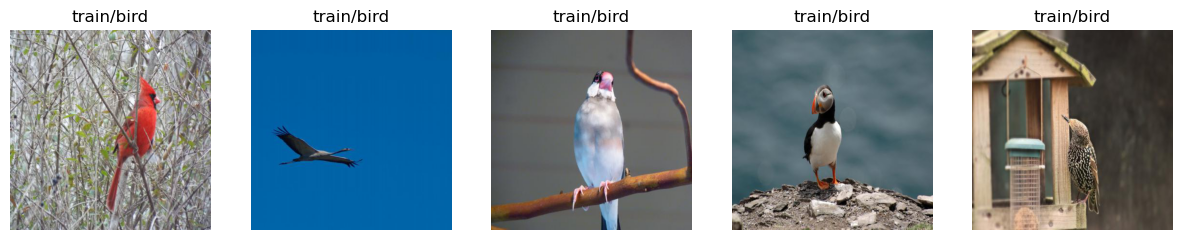

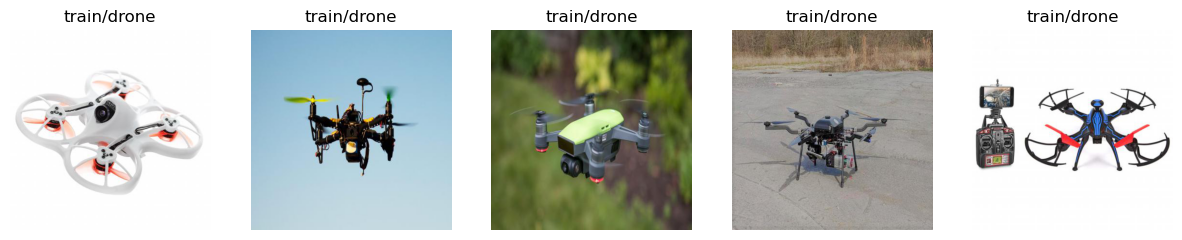

In [2]:
# Helper function to show sample images
def show_samples(split="train", cls="bird", n=5):
    folder = base_dir / split / cls
    images = [
        f for f in os.listdir(folder)
        if f.lower().endswith((".jpg", ".jpeg", ".png"))
    ]

    samples = random.sample(images, min(n, len(images)))

    plt.figure(figsize=(15,3))
    for i, img_name in enumerate(samples):
        img = Image.open(folder / img_name)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{split}/{cls}")
        plt.axis("off")
    plt.show()

show_samples("train", "bird")
show_samples("train", "drone")


#### 4️⃣ Visualizing Sample Images (Birds & Drones)

In this section I create a helper function show_samples to:
Pick a few random images from a given split and class (e.g., train/bird)
Display them in a row using matplotlib

I then call this function for:
* train/bird
* train/drone

#### This quick visual check helps verify:
* The images look reasonable
* There are no obviously wrong labels
* The visual differences between birds and drones

In [3]:
# 5️⃣ Checking Class Balance in the Training Set
total_train = df_counts["train"].sum()
for cls in classes:
    pct = df_counts["train"][cls] / total_train * 100
    print(f"{cls}: {pct:.2f}%")


bird: 53.12%
drone: 46.88%


#### 5️⃣ Checking Class Balance in the Training Set

Here I use the df_counts table to:

Compute the total number of training images

Calculate the percentage of images per class in the train split

Print the distribution for bird and drone

This tells me whether the dataset is balanced or imbalanced.
A roughly 50–50 split is ideal; a strong imbalance may require extra techniques like class weighting or more aggressive augmentation.